In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
news_twitters = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']

In [4]:
#for loop to collect all tweet data from each news org
merged_tweets = []
tweet_count = []

for x in news_twitters:
    num_tweets = 0
    for status in tweepy.Cursor(api.user_timeline, id=x).items(500):
        merged_tweets.append(status)
        num_tweets += 1
        tweet_count.append(num_tweets)

In [5]:
df = pd.DataFrame([x._json for x in merged_tweets])[['text', 'created_at', 'user']]
df['label'] = df.user.map(lambda x: x.get('name'))
df['tweet_count'] = tweet_count
df.head()

,text,created_at,user,label,tweet_count
0,RT @BBC6Music: 👏 What was the best gig you saw...,Sun Jul 01 20:43:50 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,1
1,"RT @bbc5live: “We said jokingly, ‘is it a shar...",Sun Jul 01 19:36:52 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,2
2,Get unprecedented access to the hidden world o...,Sun Jul 01 19:27:02 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,3
3,✈️🌍 @RomeshRanga travels way beyond his comfor...,Sun Jul 01 19:02:03 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,4
4,Why were these photos of the Great Depression ...,Sun Jul 01 18:00:19 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,5


In [6]:
analyzer = SentimentIntensityAnalyzer() # Initialize the class

In [7]:
merged_text = [x._json['text'] for x in merged_tweets]

In [8]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for tweet in merged_text:
    vs = analyzer.polarity_scores(tweet)
    compound_list.append(vs.get('compound'))
    positive_list.append(vs.get('pos'))
    negative_list.append(vs.get('neg'))
    neutral_list.append(vs.get('neu'))

In [9]:
df['compound_score'] = compound_list
df['positive_score'] = positive_list
df['negative_score'] = negative_list
df['neutral_score'] = neutral_list
df.head()

,text,created_at,user,label,tweet_count,compound_score,positive_score,negative_score,neutral_score
0,RT @BBC6Music: 👏 What was the best gig you saw...,Sun Jul 01 20:43:50 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,1,0.8299,0.290,0.000,0.710
1,"RT @bbc5live: “We said jokingly, ‘is it a shar...",Sun Jul 01 19:36:52 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,2,0.6588,0.155,0.000,0.845
2,Get unprecedented access to the hidden world o...,Sun Jul 01 19:27:02 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,3,0.4019,0.130,0.000,0.870
3,✈️🌍 @RomeshRanga travels way beyond his comfor...,Sun Jul 01 19:02:03 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,4,-0.2957,0.168,0.176,0.657
4,Why were these photos of the Great Depression ...,Sun Jul 01 18:00:19 +0000 2018,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,5,-0.0516,0.211,0.273,0.515


In [10]:
#change 'created at' from sting to datetime objet
from datetime import datetime

def convert_twitter_created_at_to_datetime(string_time):
    return datetime.strptime(string_time,'%a %b %d %H:%M:%S +0000 %Y')

df['created_at'] = df.created_at.map(convert_twitter_created_at_to_datetime)

In [11]:
colors = {'BBC':"green", 'CBS':"black", 'CNN':"blue", 'Fox News':"red", 'The New York Times':"yellow"}
df['color'] = df['label'].apply(lambda x: colors[x])
df.head()

,text,created_at,user,label,tweet_count,compound_score,positive_score,negative_score,neutral_score,color
0,RT @BBC6Music: 👏 What was the best gig you saw...,2018-07-01 20:43:50,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,1,0.8299,0.290,0.000,0.710,green
1,"RT @bbc5live: “We said jokingly, ‘is it a shar...",2018-07-01 19:36:52,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,2,0.6588,0.155,0.000,0.845,green
2,Get unprecedented access to the hidden world o...,2018-07-01 19:27:02,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,3,0.4019,0.130,0.000,0.870,green
3,✈️🌍 @RomeshRanga travels way beyond his comfor...,2018-07-01 19:02:03,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,4,-0.2957,0.168,0.176,0.657,green
4,Why were these photos of the Great Depression ...,2018-07-01 18:00:19,"{'id': 19701628, 'id_str': '19701628', 'name':...",BBC,5,-0.0516,0.211,0.273,0.515,green


In [12]:
df.to_csv('output_data_file.csv')

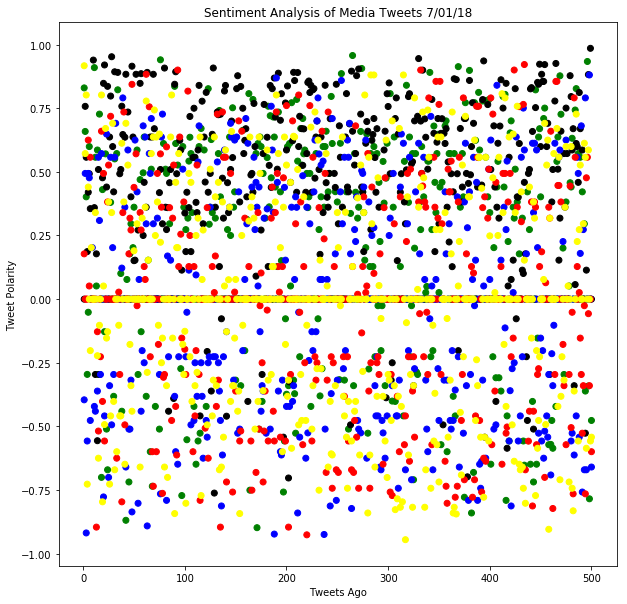

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(df.tweet_count, df.compound_score, c = df.color)
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets 7/01/18')
plt.savefig('tweet_sentiment_scatter.png')

In [14]:
mean_compound = df.groupby(['label']).compound_score.mean().reset_index()
mean_compound

,label,compound_score
0,BBC,0.150650
1,CBS,0.357811
2,CNN,-0.017025
3,Fox News,-0.002535
4,The New York Times,-0.006597


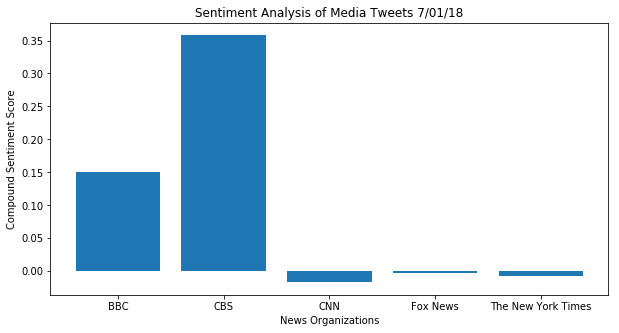

In [15]:
plt.figure(figsize=(10, 5))
plt.bar(mean_compound['label'], mean_compound['compound_score'])
plt.xlabel('News Organizations')
plt.ylabel('Compound Sentiment Score')
plt.title('Sentiment Analysis of Media Tweets 7/01/18')
plt.savefig('tweet_sentiment_bar.png')